In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [13]:
train_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
277,278,20,RL,140.0,19138,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,141000
772,773,80,RL,94.0,7819,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Abnorml,107000
687,688,160,FV,NaN,5105,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,148800
953,954,60,RL,NaN,11075,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2008,WD,Normal,172000
152,153,60,RL,NaN,14803,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,6,2006,WD,Normal,190000


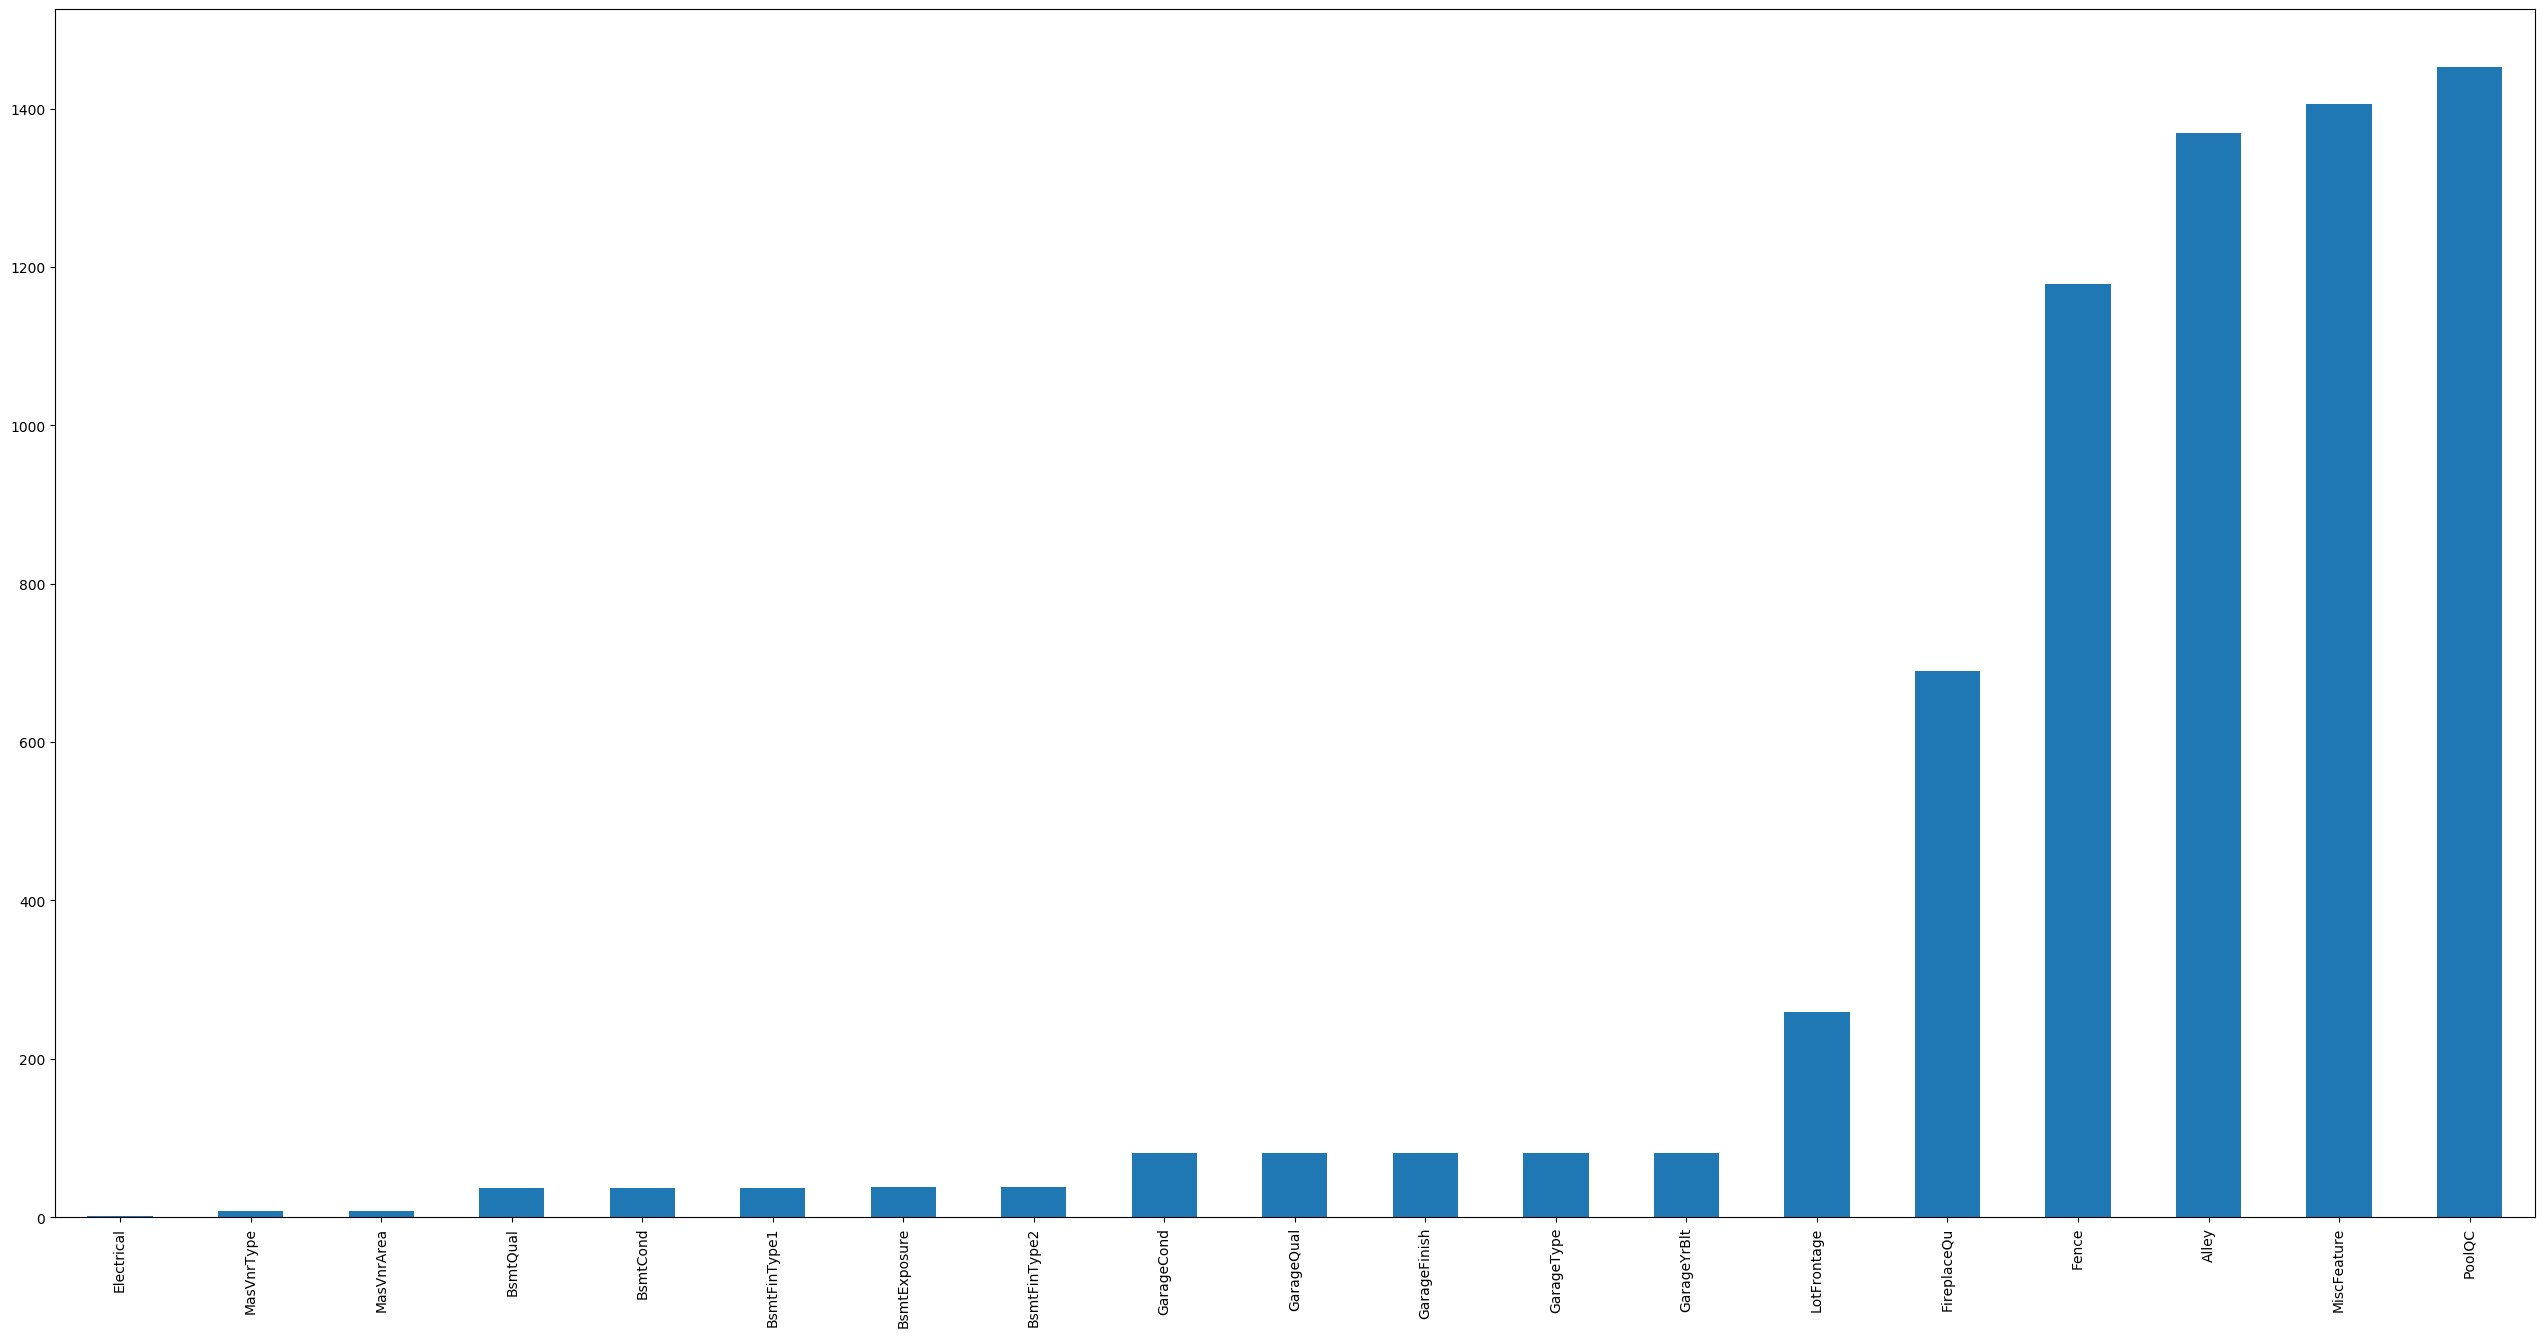

In [14]:
missing = train_df.isnull().sum(axis=0)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
drop_cols = ["MiscFeature", "PoolQC", "Fence", "FireplaceQu", "Alley", "Id"]
train_df = train_df.drop(drop_cols, axis=1)
test_df = test_df.drop(drop_cols, axis=1)

In [17]:
train_df.describe(include=["O"])

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1334,735,1360,870,605,1311,1326,1340,1267,1198


/Users/tomfujii/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


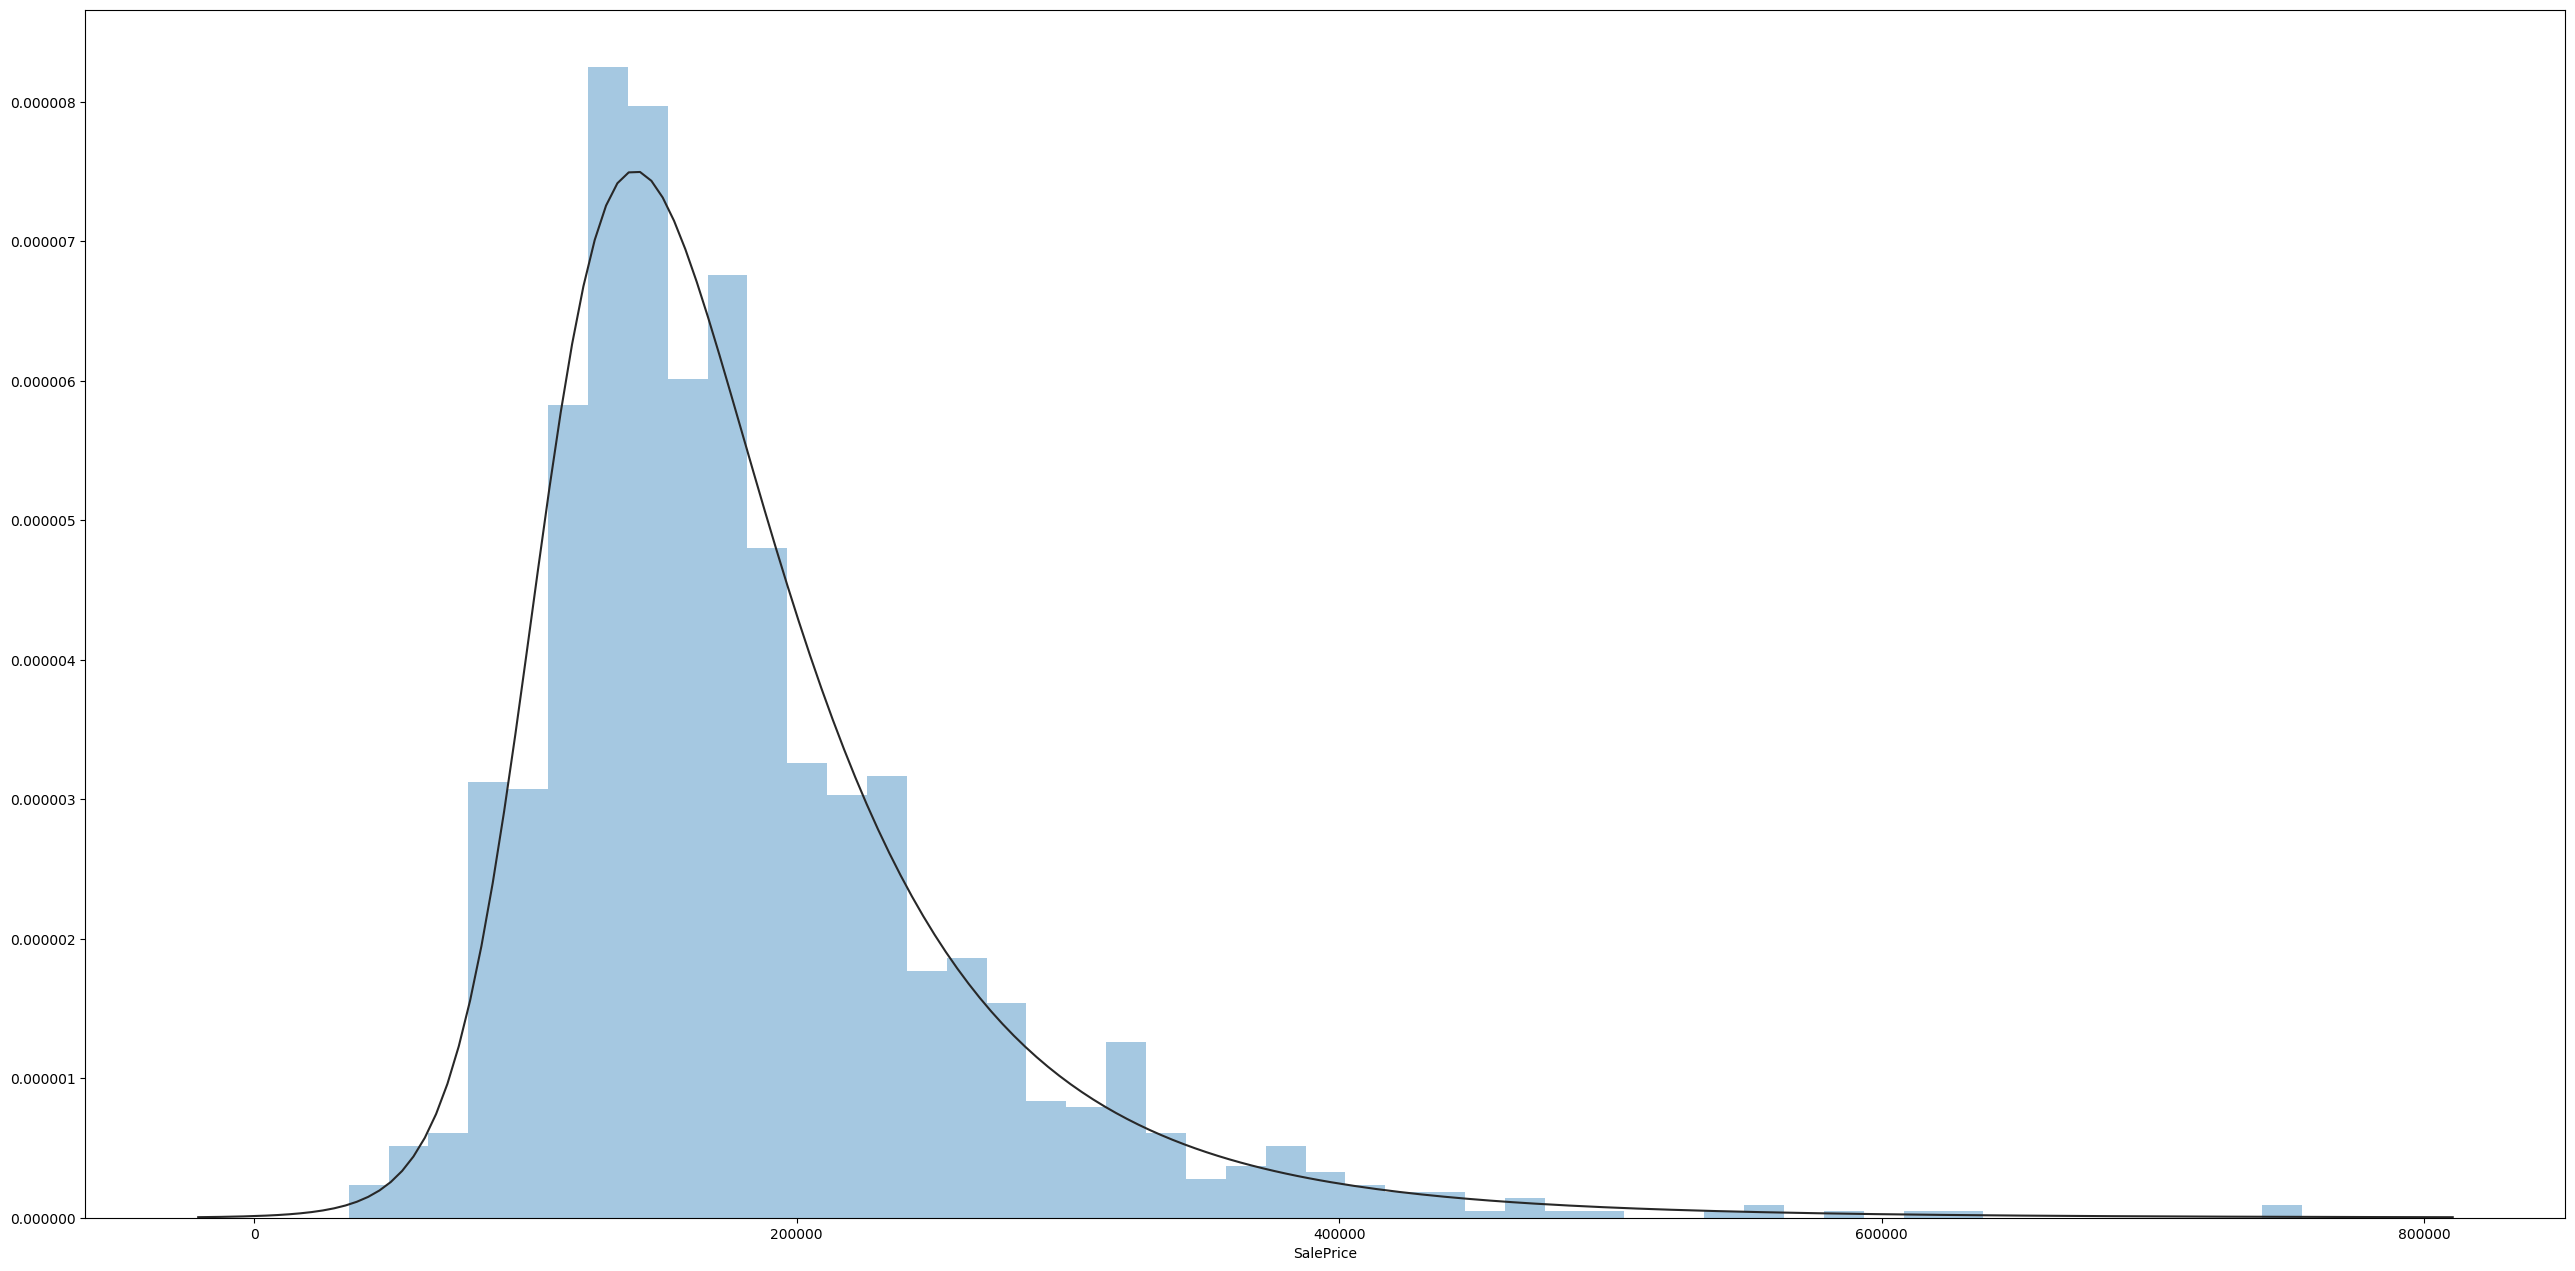

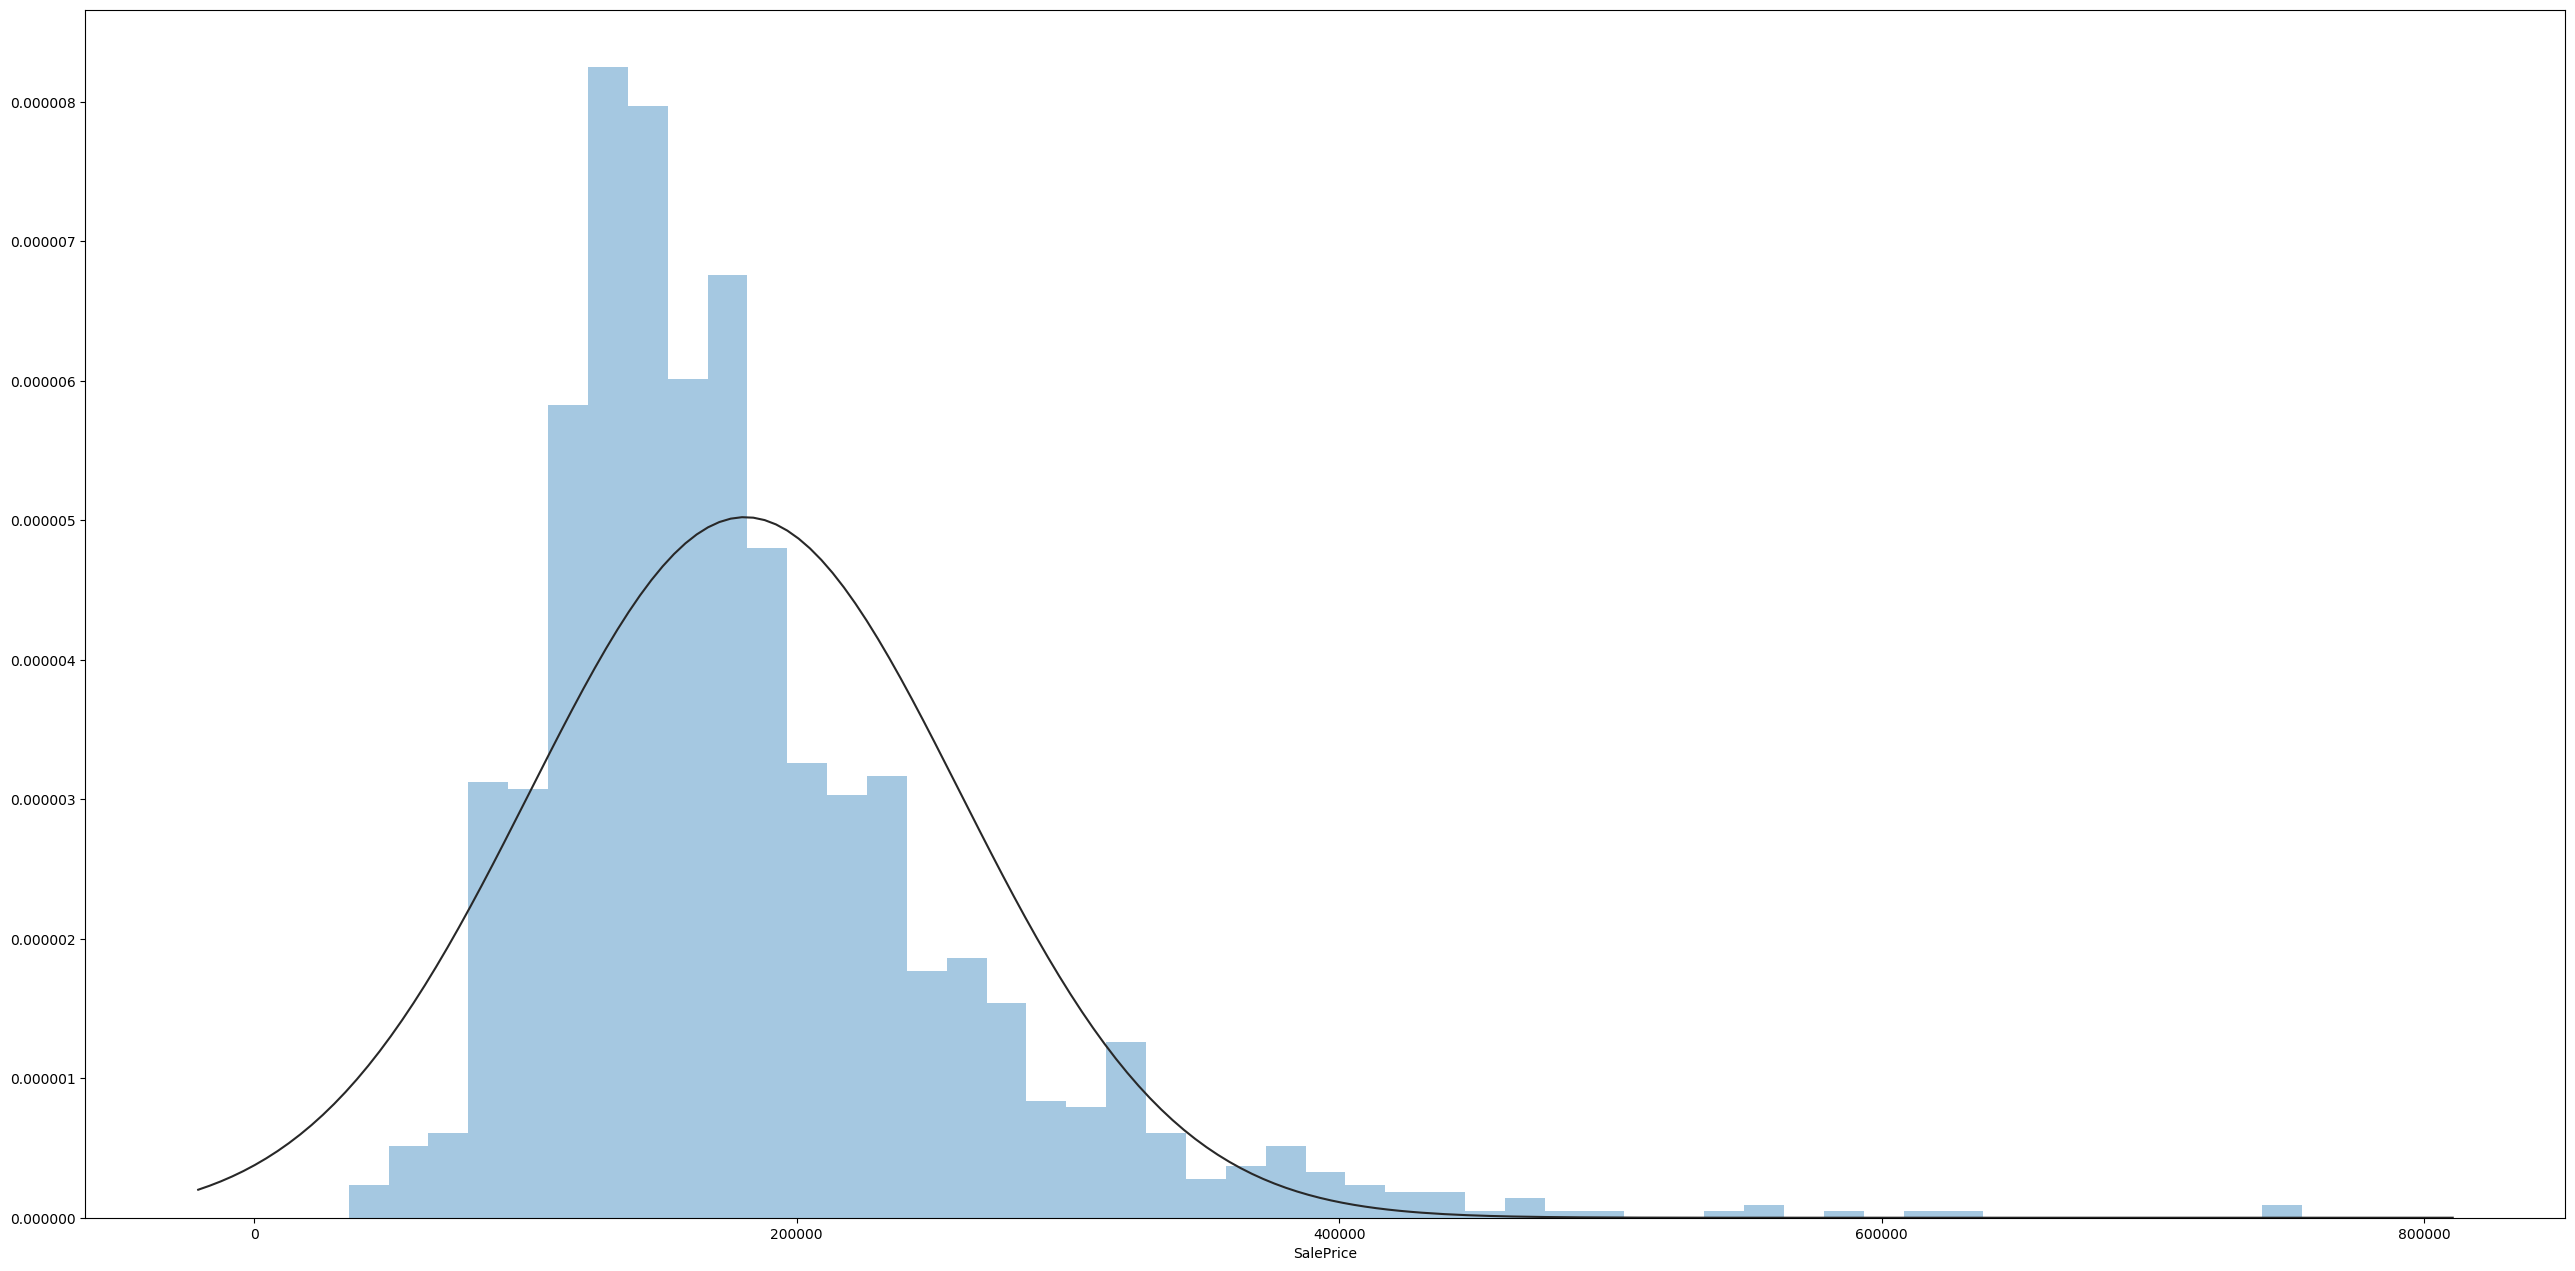

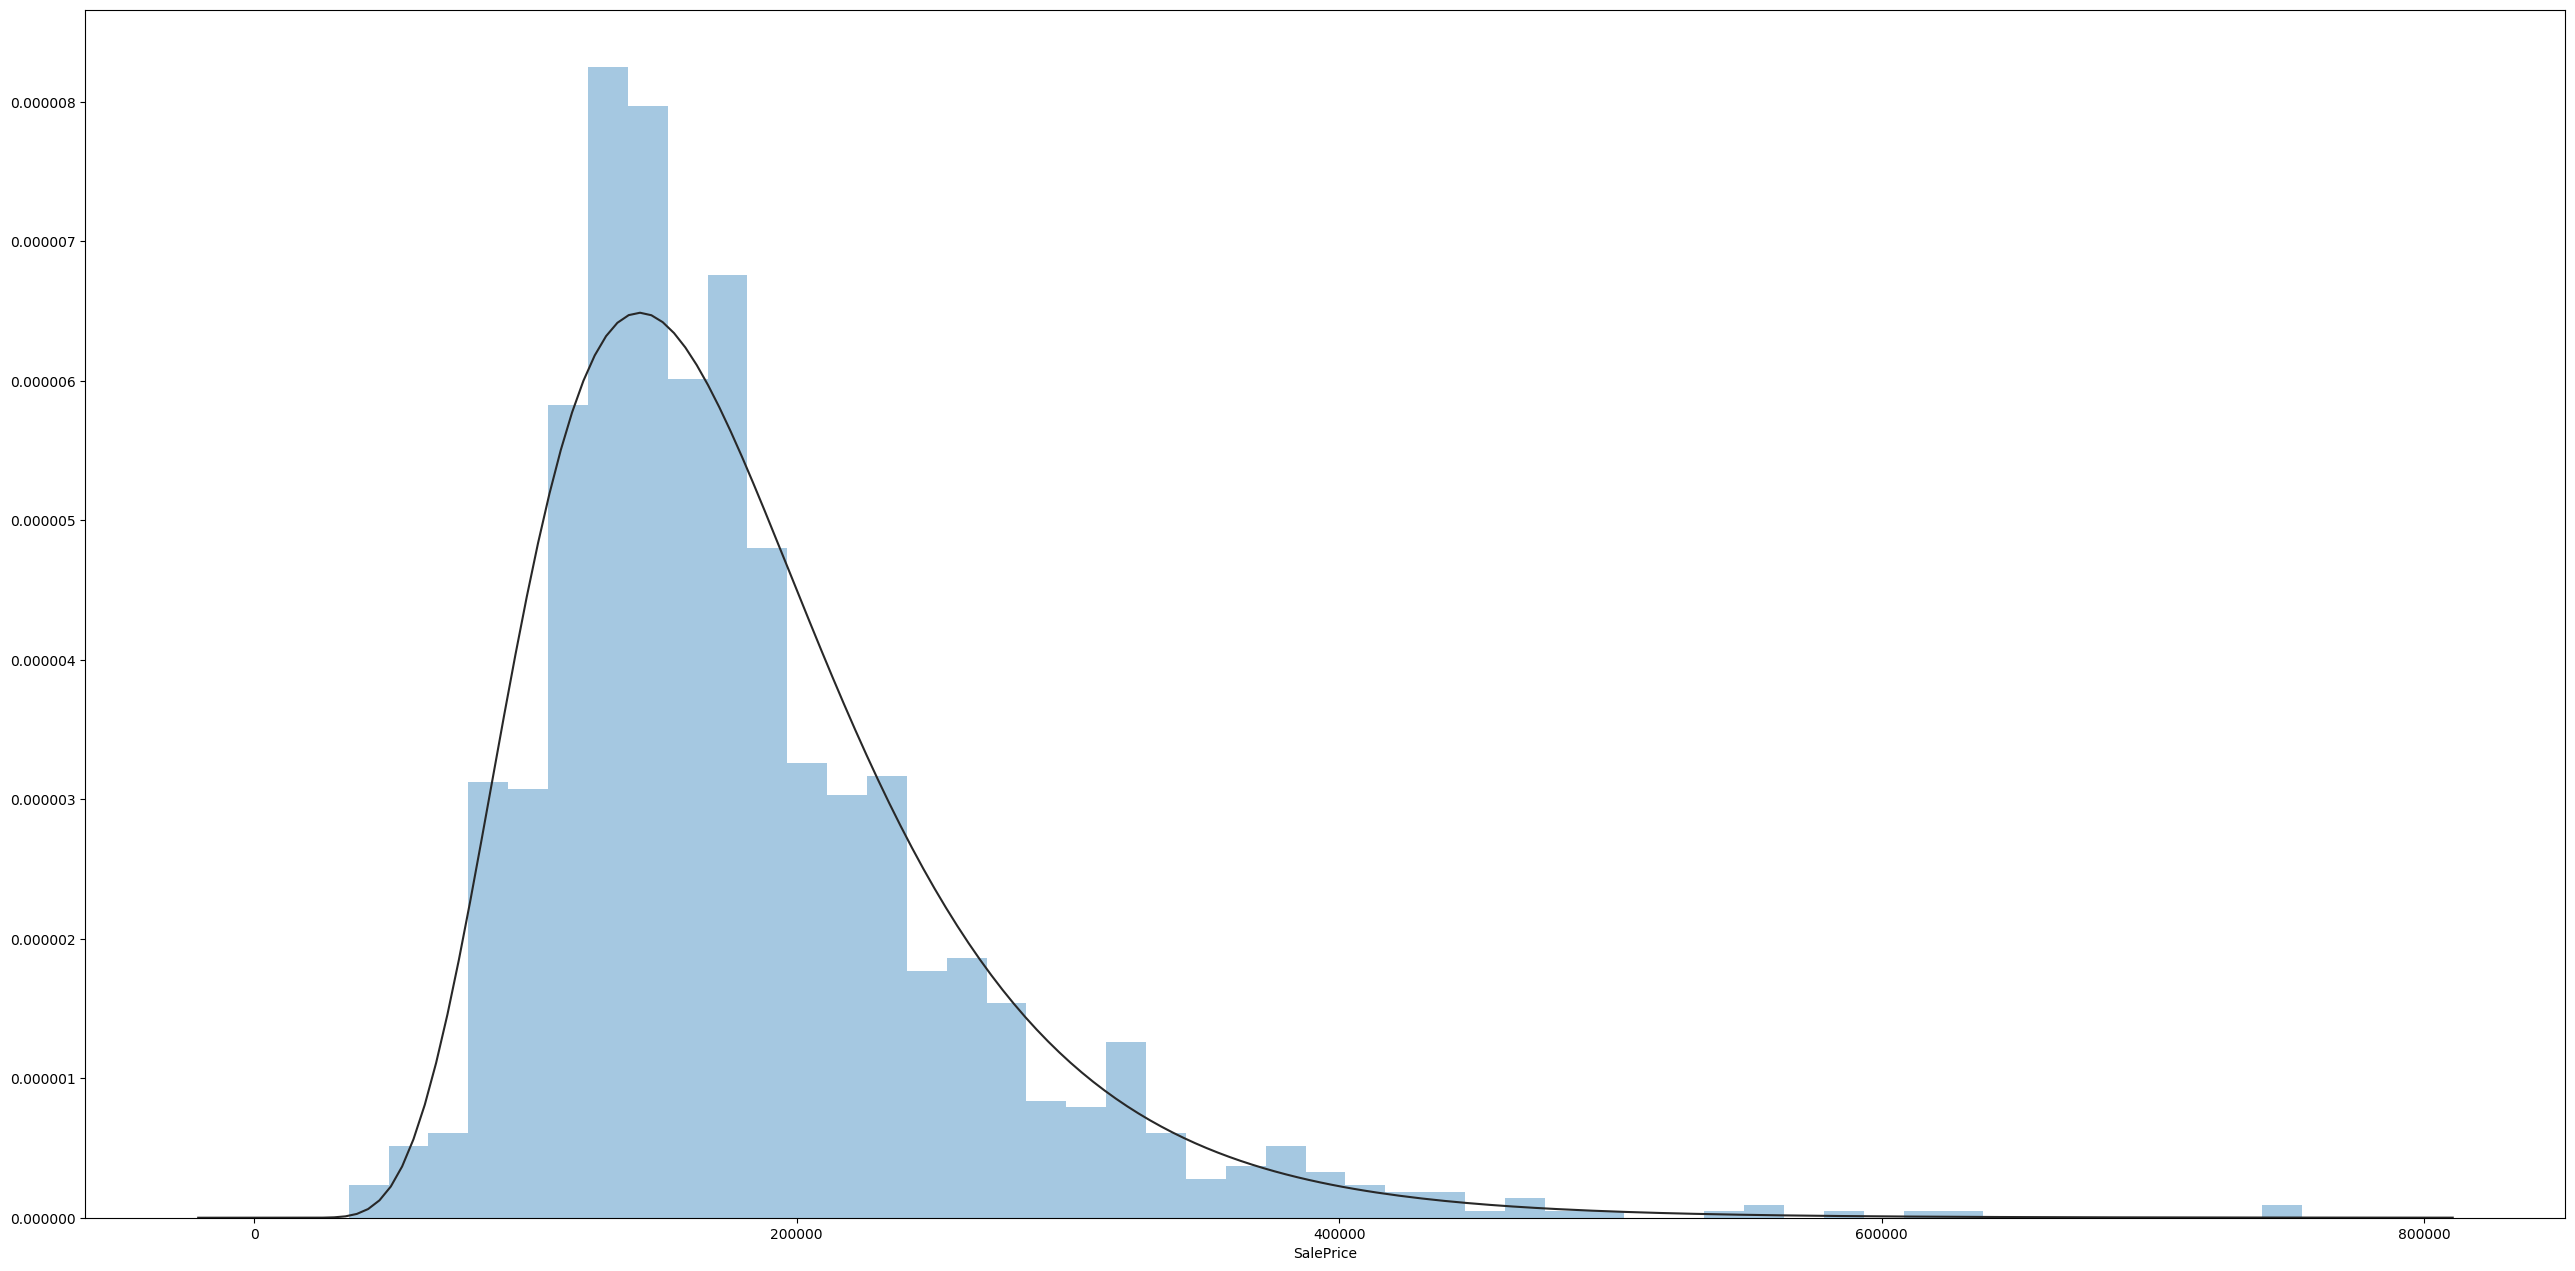

In [18]:
import scipy.stats as st

y = train_df["SalePrice"]
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure()
sns.distplot(y, kde=False, fit=st.norm)
plt.figure()
sns.distplot(y, kde=False, fit=st.lognorm)

In [19]:
from sklearn.preprocessing import LabelEncoder

def handle_categorials(train_df, test_df, cols):
    train_df_ = train_df.copy()
    test_df_ = test_df.copy()
    for col in cols:
        train_df_[col] = train_df[col].fillna("None")
        test_df_[col] = test_df[col].fillna("None")
    for col in cols:
        data = pd.concat((train_df_[col], test_df_[col]))
        labeler = LabelEncoder()
        labeler.fit(data)
        train_df_[col] = labeler.transform(train_df_[col])
        test_df_[col] = labeler.transform(test_df_[col])
    return train_df_, test_df_


def handle_quantitatives(train_df, test_df, cols):
    train_df_ = train_df.copy()
    test_df_ = test_df.copy()
    for col in cols:
        data = pd.concat((train_df_[col], test_df_[col]))
        med_val = data.dropna().median()
        train_df_[col] = train_df_[col].fillna(med_val)
        test_df_[col] = test_df_[col].fillna(med_val)
    return train_df_, test_df_

In [20]:
categorial_cols = train_df.describe(include="O").columns
train_df, test_df = handle_categorials(train_df, test_df, categorial_cols)
q_cols = [col for col in train_df.columns if col not in categorial_cols and col != "SalePrice"]
train_df, test_df = handle_quantitatives(train_df, test_df, q_cols)

In [21]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,4,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,9,4,208500
1,20,4,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,9,4,181500
2,60,4,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,9,4,223500
3,70,4,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,9,0,140000
4,60,4,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,9,4,250000


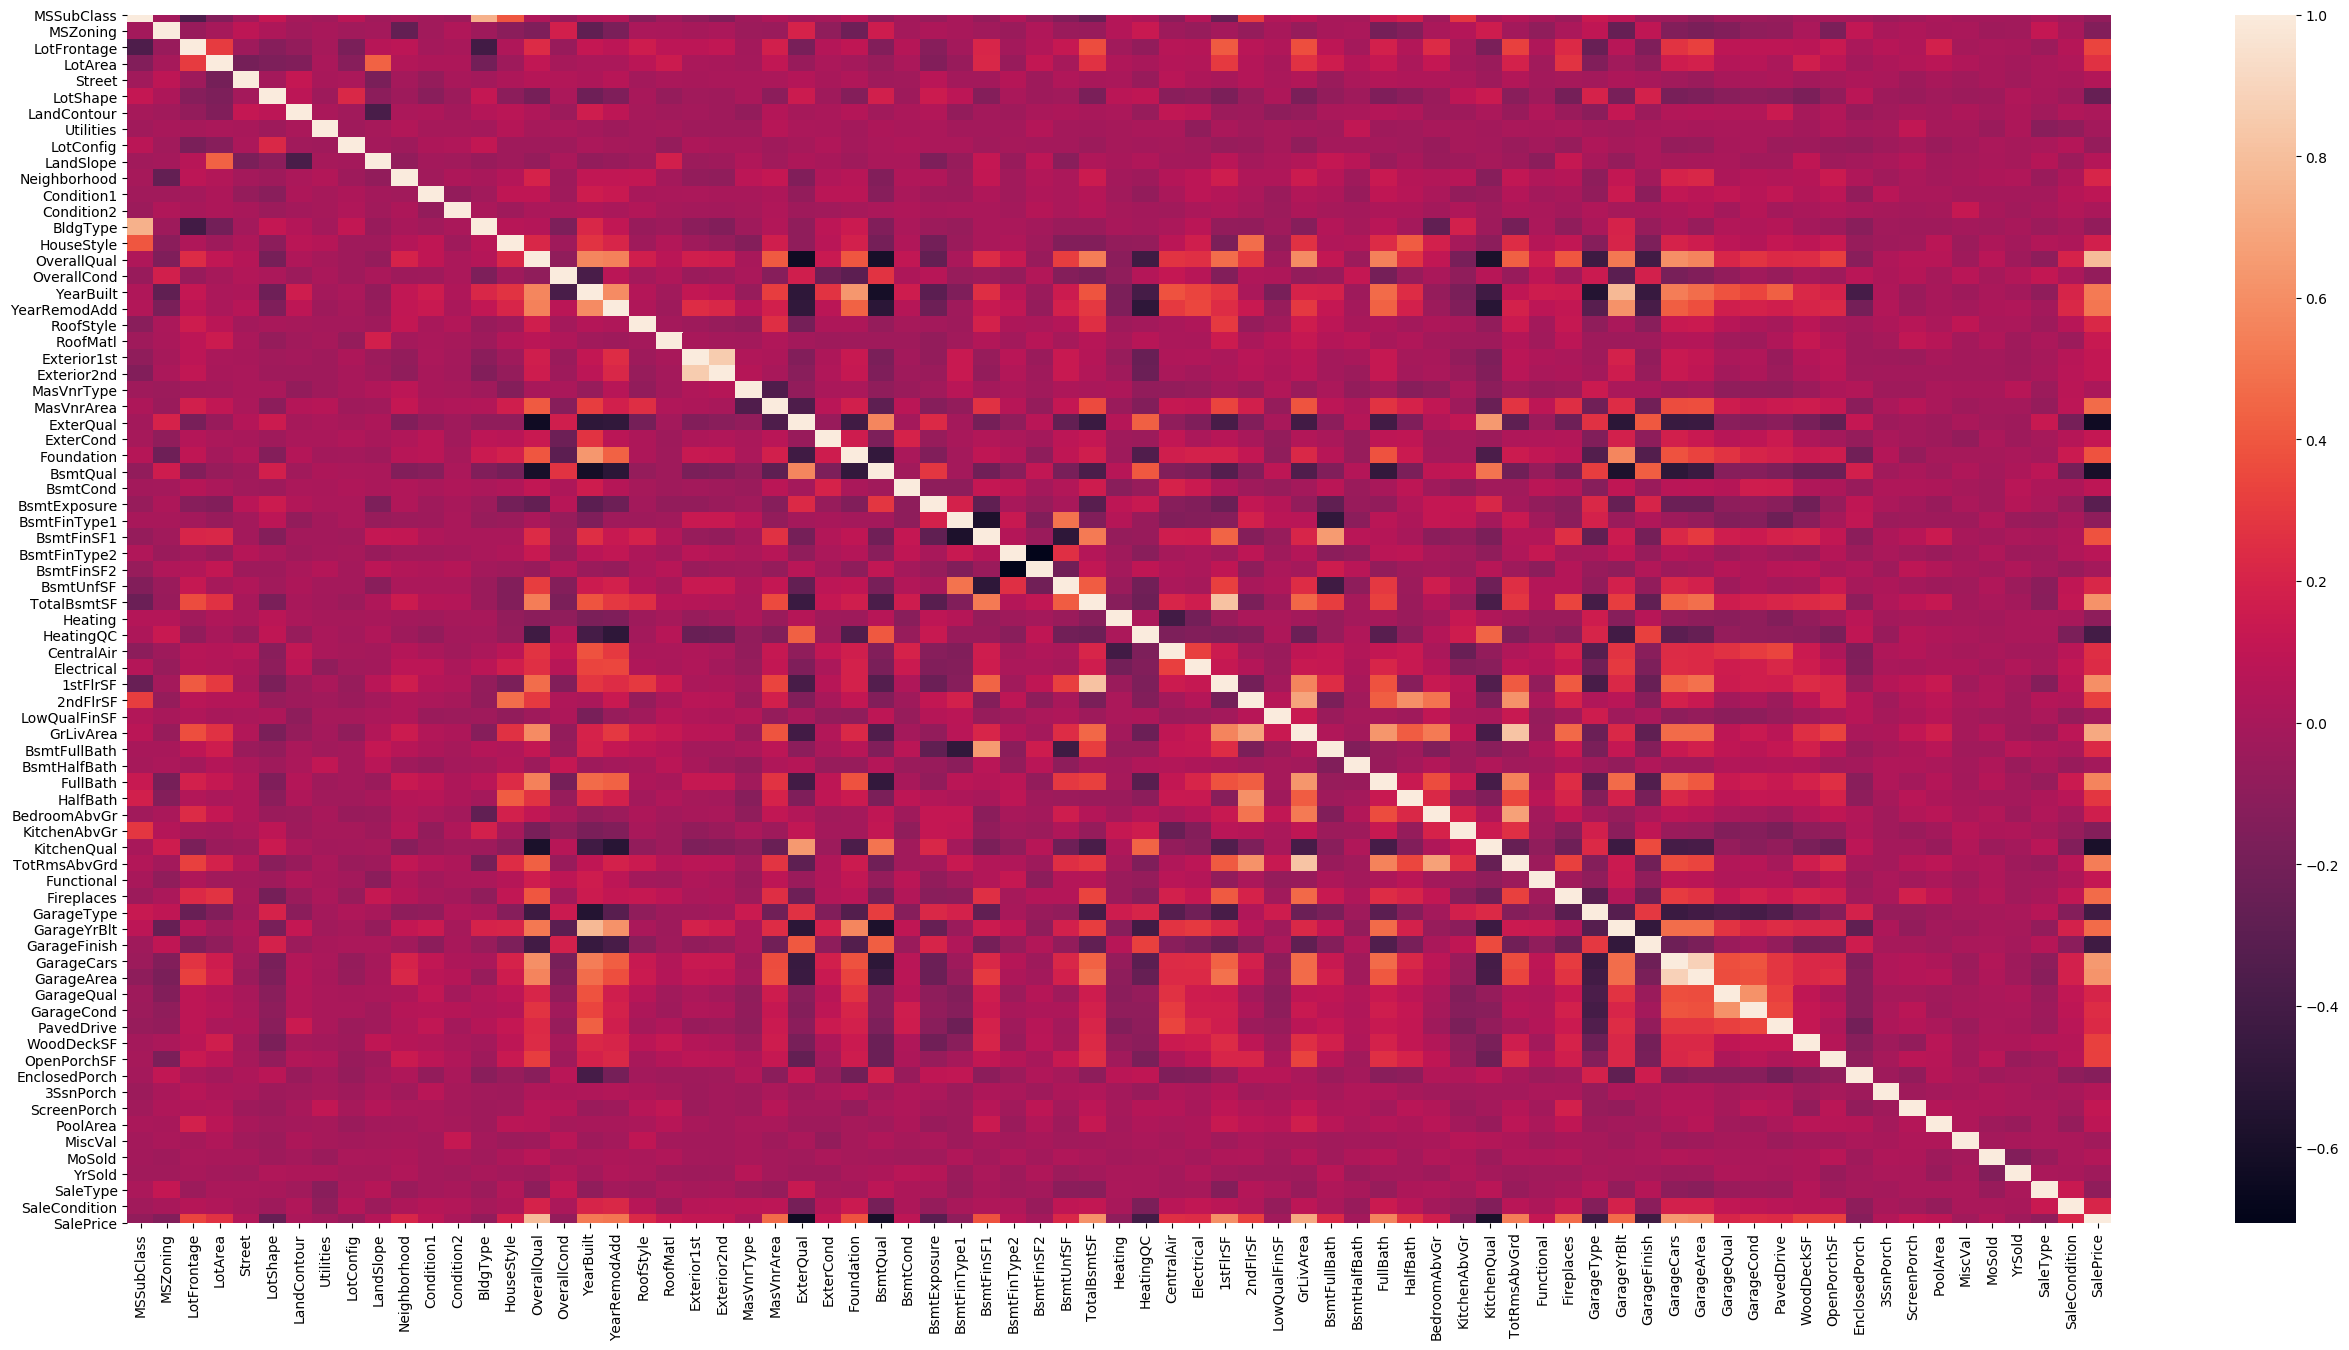

In [22]:
sns.heatmap(train_df.corr())

In [23]:
train_df.shape

(1460, 75)

In [24]:
from finance_ml.distance import mutual_info

mutual_infos = dict()
y = train_df["SalePrice"]
for col in train_df:
    if col == "SalePrice":
        continue
    score = mutual_info(train_df[col], y, normalize=True)
    mutual_infos[col] = score

In [29]:
mutual_infos = dict(sorted(mutual_infos.items(), key=lambda x: x[1], reverse=True))
mutual_infos

{'ExterQual': 0.3588616228179952,
 'OverallQual': 0.33703037151208215,
 'FullBath': 0.31176750871839987,
 'GarageCars': 0.30473432359306657,
 'KitchenQual': 0.2871921615747507,
 'BsmtQual': 0.2674097067474062,
 'CentralAir': 0.2484694705566148,
 'GrLivArea': 0.24662129313928308,
 'TotalBsmtSF': 0.2239808953540139,
 'GarageArea': 0.21332886145959504,
 'Neighborhood': 0.19573949019709927,
 'YearBuilt': 0.1927294630559904,
 'PoolArea': 0.18947513062144972,
 'GarageFinish': 0.18625718253377202,
 'GarageCond': 0.18576362564180027,
 'GarageType': 0.17427294033276355,
 'GarageQual': 0.1719763514830911,
 '1stFlrSF': 0.17166410039825195,
 'Foundation': 0.171445447524959,
 'YearRemodAdd': 0.15761683340059987,
 'Fireplaces': 0.15197028690250525,
 'GarageYrBlt': 0.150981314839267,
 'Condition2': 0.14264270626908931,
 'RoofMatl': 0.14185324645831246,
 'TotRmsAbvGrd': 0.14050367655698962,
 'MSZoning': 0.1404974671322226,
 'BsmtFinSF1': 0.13966281410592007,
 'Heating': 0.13532261166448134,
 'PavedDri

In [33]:
top_cols = list(mutual_infos.keys())[:10]
train_df[top_cols].describe()

,ExterQual,OverallQual,FullBath,GarageCars,KitchenQual,BsmtQual,CentralAir,GrLivArea,TotalBsmtSF,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2.539726,6.099315,1.565068,1.767123,2.843151,2.724658,0.934932,1515.463699,1057.429452,472.980137
std,0.693995,1.382997,0.550916,0.747315,1.266720,1.278630,0.246731,525.480383,438.705324,213.804841
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000
25%,2.000000,5.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1129.500000,795.750000,334.500000
50%,3.000000,6.000000,2.000000,2.000000,4.000000,2.000000,1.000000,1464.000000,991.500000,480.000000
75%,3.000000,7.000000,2.000000,2.000000,4.000000,4.000000,1.000000,1776.750000,1298.250000,576.000000
max,3.000000,10.000000,3.000000,4.000000,4.000000,4.000000,1.000000,5642.000000,6110.000000,1418.000000


In [41]:
import lightgbm as lgb


model = lgb.LGBMRegressor(n_estimators=100)
model.fit(train_df, y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [42]:
model.feature_importances_

array([  10,   51,   71,   95,    0,    7,    4,    0,    1,    0,   30,
          7,    0,    1,    3,   21,   17,   67,   41,    1,    1,    7,
          9,    4,   18,    6,    2,    2,    9,    8,   15,    9,  161,
          0,    2,   50,   79,    1,    2,   12,    2,  142,   88,    2,
        182,    3,    1,   23,   11,    5,    0,    2,    8,    0,    4,
          3,   27,    6,    3,   83,    1,    3,    2,   36,   61,    5,
          0,    5,    0,    0,   30,   18,    6,   14, 1400], dtype=int32)

In [44]:
pred = model.predict(train_df)

In [46]:
pred

array([208810.5045289 , 181812.66346593, 223289.34253353, ...,
       265910.78561986, 142452.9125917 , 147898.13337917])

In [59]:

y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64